# <center> Differential Evolution 
# <center> Institution: Centro de Investigación en Matemáticas A.C. 
# <center> Ing. Gabriel Alejandro Aguilar Farrera  
# <center> Course: AutoML 

# Notes about DE Algorithm
* Each solution is known as chromosome/genome.
* Each chromosome undergoes mutation followed by recombination.
* Selection of better solutions is performed only after the generation of all trial vectors.

# Import libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits import mplot3d 
import random
import math
%matplotlib inline

# 0.) Himmelblaus's function

In [2]:
xmin1 = 3.0
ymin1 = 2.0
def himmelblaus(x1,x2):
    z = (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2
    return (z)

In [3]:
zmin = himmelblaus(xmin1, ymin1)
print(f'Minimum point: \n x = {xmin1} \n y = {ymin1} \n z = {zmin}')

Minimum point: 
 x = 3.0 
 y = 2.0 
 z = 0.0


# 1.) Contour lines

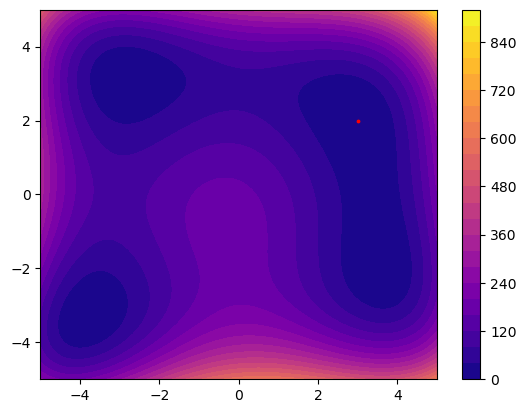

In [4]:
# Graphing limits in x
lower_x = - 5.0
upper_x = 5.0

# Graphing limits in y
lower_y = - 5.0
upper_y = 5.0
x1 = np.arange(lower_x, upper_x, 0.01)

x2= np.arange(lower_y, upper_y, 0.01)

x1mesh, x2mesh = np.meshgrid(x1,x2)
zmesh = (x1mesh**2 + x2mesh - 11)**2 + (x1mesh + x2mesh**2 - 7)**2


contour1 = plt.contourf(x1mesh, x2mesh, zmesh,  levels=25, cmap = 'plasma')
plt.xlim((lower_x, upper_x))
plt.ylim((lower_y, upper_y))
plt.scatter(xmin1, ymin1, color = 'red', marker = 'o', s = 3)
plt.colorbar(contour1)

In [5]:
# Initial parameters
N_individuos = 200     # Ni
N_variables  = 2       # Nv
lower        = - 5.0
upper        = 5.0
F            = 0.5    # Mutation Factor: [0, 2]
CR           = 0.5    # Crossover Rate:  [0,1]

# 2.) Initial population

In [6]:
def InitialPopulation(N_individuos, N_variables):
    PI = np.zeros((N_individuos, N_variables + 1))                     # Initialize the Initial Population Matrix
    for i in range (N_individuos):
        x1 = np.random.uniform(low = lower, high = upper, size = 1)
        x2 = np.random.uniform(low = lower, high = upper, size = 1)
        f  = himmelblaus(x1,x2)
        PI[i,0] = x1            # x1
        PI[i,1] = x2            # x2
        PI[i,2] = f             # fitness of (x1, x2)
    return (PI)

# 3.) Mutation: Donor Vector (V) of a chromosome (X$_{i}$) is created as follow

\begin{equation}
    V = X_{r1} + F (X_{r2} - X_{r3})
\end{equation}

* F take values of [0, 2]
* r$_{1}$, r$_{2}$ and r$_{3}$ are random solutions $\in$ {1, 2, ..., N$_{i}$} and r$1$ $\neq$ r$_{2}$ $\neq$ r$_{3}$ $\neq$ i.

In [7]:
def MutatedPopulation(N_individuos, N_variables, F, P):
    DV = np.zeros((N_individuos, N_variables + 1))                     # Initialize Donor Vector - Matrix
    for i in range (N_individuos):
        sample = np.arange(start = 0, stop = N_individuos, step = 1)
        idx = np.random.choice(a = sample, size = 3, replace = False ) # Condition: Random solutions r1 , r2 and r3 are 
        dv = P[idx[0]] + F * (P[idx[1]] - P[idx[2]])                   # donor vector. ¡ALERT!: dv do one operation more (fitness of P)
        dv1 = dv[0]                                                    # First element  of dv
        dv2 = dv[1]                                                    # Second element of dv
        f_mutated = himmelblaus(dv1, dv2)                              # Fitness of the dv
        DV[i, 0] = dv1                                                 # dv1
        DV[i, 1] = dv2                                                 # dv2
        DV[i, 2] = f_mutated                                           # Fitness of dv
    return (DV)

# 4.) Recombination: Crossover and Offspring
* This increase the diversity
* Creation of trial vector can be:

\begin{equation}
  u^{j} = \begin{cases}
    v^{j}, & \text{if r $\leq$ CR or j = $\delta$}.\\
    u^{j}, & \text{if r $>$ CR and j $\neq$ $\delta$}.
  \end{cases}
\end{equation}

Where
* CR is the crossover probability and is selected between 0 and 1.
* $\delta$ is the randomly selected variable location, $\delta$ $\in$ [1, 2,..., N$_{v}$].
* r is a random number between 0 and 1.
* u$^{j}$ is the j-th variable (ubication) of trial vector.
* v$^{j}$ is the j-th variable (ubication) of donor vector.
* x$^{j}$ is the j-th variable (ubication) of target vector. 

Besides
* j = $\delta$ ensures that at least one element of the population (variable) is obtained from the donor vector.
* Probability for crossover (CR) is generally high.
* High CR results in more variables from donor vector.

In [8]:
def CrossoverPopulation(N_individuos, N_variables, CR, P, DV):
    fitness = N_variables
    TV = np.zeros((N_individuos, N_variables + 1))                               # Initialize Trial Vector
    Offspring = np.zeros((N_individuos, N_variables + 1))                        # Initialize Offspring
    delta = np.arange(start = 0, stop = N_variables, step = 1)                   # Initialize delta
    for i in range (N_individuos):
        r1 = np.random.choice(a = delta, size = 1, replace = False)              # Initialize j. Length(j) = 1
        r2 = np.random.uniform(low = 0.0, high = 1.0, size = N_variables)        # Initialize r. Length(r) = N_variables (2)
        for j in range (N_variables):
            if (r2[j] <= CR or j == r1):
                TV[i, j] = DV[i,j]
            else:
                 TV[i, j] = P[i,j]
        f_tv  = himmelblaus(TV[i, 0], TV[i,1])
        TV[i, fitness] = f_tv
        if (TV[i, fitness] < P[i, fitness]):
            Offspring[i, 0] = TV[i, 0]
            Offspring[i, 1] = TV[i, 1]
            Offspring[i, fitness]  = TV[i, fitness] 
        else:
            Offspring[i, 0] = P[i, 0]
            Offspring[i, 1] = P[i, 1]
            Offspring[i, fitness]  = P[i, fitness] 
    return (Offspring)

# 5.) Generating the Initial Population

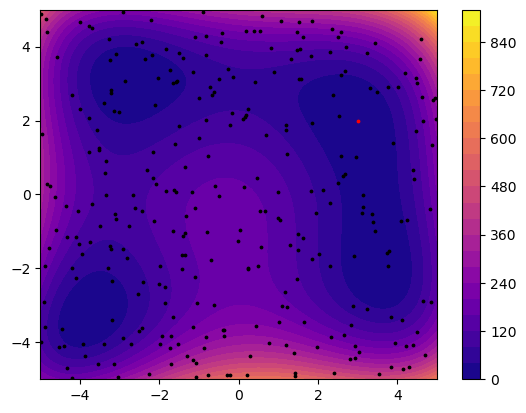

In [9]:
# Initial parameters
N_individuos = 300     # Ni
N_generations = 85
N_variables  = 2       # Nv
lower        = - 5.0
upper        = 5.0
F            = 0.5    # Mutation Factor: [0, 2]
CR           = 0.5    # Crossover Rate:  [0,1]
PI = InitialPopulation(N_individuos, N_variables)
P  = PI
StatsEval = np.zeros((N_generations + 1, 5)) # k, min, max, mean, std
StatsEval[0,:] = [0, np.min(P[:,2]), np.max(P[:,2]), np.mean(P[:,2]), np.std(P[:,2])]
contour1 = plt.contourf(x1mesh, x2mesh, zmesh,  levels=25, cmap = 'plasma')
plt.xlim((lower_x, upper_x))
plt.ylim((lower_y, upper_y))
plt.scatter(xmin1, ymin1, color = 'red', marker = 'o', s = 3)
plt.colorbar(contour1)
plt.scatter(P[:,0], P[:,1], color = 'black', marker = 'o', s = 3)

# 6.) Generating loop

In [10]:
for k in range (N_generations):
    DV = MutatedPopulation(N_individuos, N_variables, F, P)
    Offspring = CrossoverPopulation(N_individuos, N_variables, CR, P, DV) 
    P = Offspring
    StatsEval[k+1,:] = [k+1, np.min(P[:,2]), np.max(P[:,2]), np.mean(P[:,2]), np.std(P[:,2])]

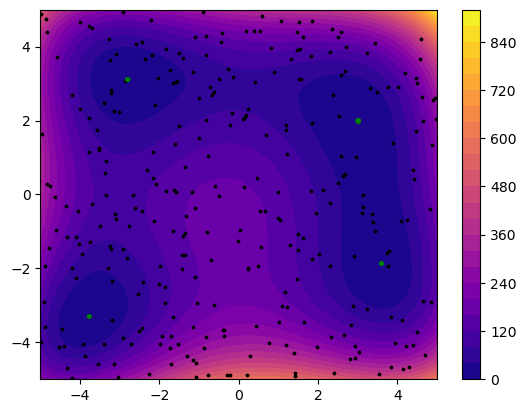

In [11]:
contour1 = plt.contourf(x1mesh, x2mesh, zmesh,  levels=25, cmap = 'plasma')
delta = 0.0
plt.xlim((lower_x - delta, upper_x + delta))
plt.ylim((lower_y - delta, upper_y +delta))
plt.scatter(xmin1, ymin1, color = 'red', marker = 'o', s = 3)
plt.colorbar(contour1)
plt.scatter(PI[:,0], PI[:,1], color = 'black', marker = 'o', s = 3)
plt.scatter(P[:,0], P[:,1], color = 'green', marker = 'o', s = 3)
plt.savefig('DE.png')

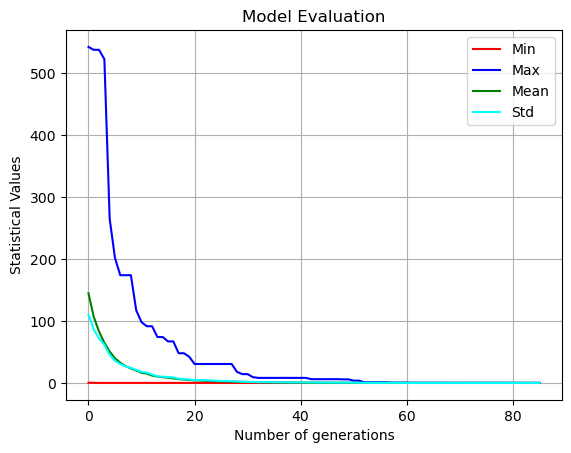

In [12]:
plt.plot(StatsEval[:,0], StatsEval[:,1], color = 'red', label = 'Min'  )
plt.plot(StatsEval[:,0], StatsEval[:,2], color = 'blue', label = 'Max' )
plt.plot(StatsEval[:,0], StatsEval[:,3], color = 'green', label = 'Mean' )
plt.plot(StatsEval[:,0], StatsEval[:,4], color = 'cyan', label = 'Std' )
plt.legend()
plt.xlabel('Number of generations')
plt.ylabel('Statistical Values')
plt.title('Model Evaluation')
plt.grid()
plt.show()